In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import os
import numpy as np
price_csv = "exports\elec_prices_state.csv"
population_csv = "exports\PopTaxes_state.csv"
#populationEST_csv="data\nst-est2019-01.csv" 
populationEST_csv=os.path.join("data","nst-est2019-01.csv")

In [4]:
#importing and cleaning price data
price_data = pd.read_csv(price_csv)
price_data = price_data.drop(['Unnamed: 0'], axis=1)
price_data = price_data.rename(columns = {"State":"State Abbreviation"})

In [5]:
#importing and cleaning population data
population_data = pd.read_csv(population_csv)
population_data = population_data.drop(['Unnamed: 0','Abbreviation_y'], axis=1)

In [6]:
#importing and cleaning population ESTIMATE data
populationEST_data=pd.read_csv(populationEST_csv)
populationEST_data=populationEST_data.rename(columns = {"Unnamed: 0":"State"})
populationEST_data=populationEST_data.drop(columns=["Census","Estimates Base"])

In [8]:
Analysis1_df = price_data.merge(populationEST_data,on="State Abbreviation")
Analysis1_df.head()

,State Abbreviation,2020 price,2019 price,2018 price,2017 price,2016 price,2015 price,2020 so far sales,2019 sales,2018 sales,...,2010 Pop Est,2011 Pop Est,2012 Pop Est,2013 Pop Est,2014 Pop Est,2015 Pop Est,2016 Pop Est,2017 Pop Est,2018 Pop Est,2019 Pop Est
0,AL,9.73,9.88,9.63,9.83,9.56,9.33,39555.42529,87734.82971,90280.45601,...,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185
1,AK,20.15,20.43,19.36,19.10,17.93,17.59,3004.94888,5840.97456,5972.46697,...,713910,722128,730443,737068,736283,737498,741456,739700,735139,731545
2,AZ,10.30,10.64,10.85,10.64,10.33,10.34,36209.02713,77720.38750,78346.30198,...,6407172,6472643,6554978,6632764,6730413,6829676,6941072,7044008,7158024,7278717
3,AR,8.09,8.13,7.78,8.26,8.13,8.19,21469.48132,47916.95892,49602.70799,...,2921964,2940667,2952164,2959400,2967392,2978048,2989918,3001345,3009733,3017804
4,CA,17.03,17.04,16.58,16.06,15.23,15.42,112830.38146,247679.77249,255224.27196,...,37319502,37638369,37948800,38260787,38596972,38918045,39167117,39358497,39461588,39512223


correlation coefficient is 0.02


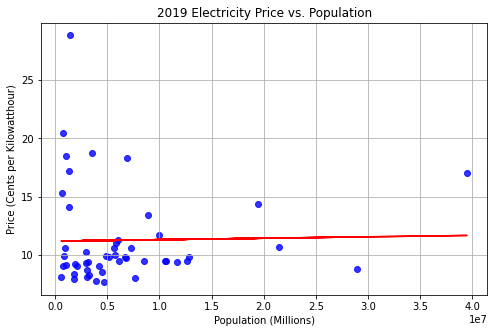

In [9]:
#correlation calculation
correlation = st.pearsonr((Analysis1_df["2019 Pop Est"]),(Analysis1_df["2019 price"]))
print(f"correlation coefficient is {round(correlation[0],2)}")

slope, intercept, rvalue, pvalue, stderr = linregress((Analysis1_df["2019 Pop Est"]),(Analysis1_df["2019 price"]))
regression_values = (Analysis1_df["2019 Pop Est"]) * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8,5))
plt.scatter(x=(Analysis1_df["2019 Pop Est"]), y=(Analysis1_df["2019 price"]), marker="o", facecolors="blue", alpha=0.8)
plt.plot((Analysis1_df["2019 Pop Est"]), regression_values, "red")
#plt.annotate(line_eq, fontsize=15, color="red")
plt.title('2019 Electricity Price vs. Population')
plt.ylabel('Price (Cents per Kilowatthour)')
plt.xlabel("Population (Millions)")
#plt.annotate(Analysis1_df["State Abbreviation"], (3,3))
plt.grid()
#plt.savefig("exports/2019_price_vs_population.png")

<ipython-input-40-e39f388d3d0c>:21: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax.background_patch.set_visible(False)
<ipython-input-40-e39f388d3d0c>:22: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)


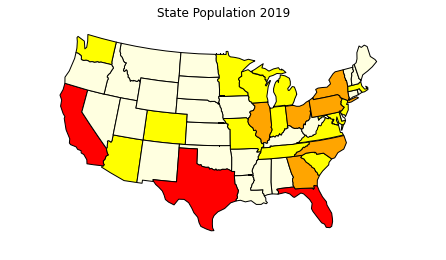

<Figure size 576x360 with 0 Axes>

Red = +20 million people, orange =+10 million people, yellow = +5 million people


In [40]:
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import matplotlib as mpl

tag_dict = dict(zip(Analysis1_df["State"], Analysis1_df["2019 Pop Est"]))

fig = plt.figure()

ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())

ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

#max_users = float(max(Analysis1_df["2019 Pop Est"]))
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                     category='cultural', name=shapename)

#cmap = mpl.cm.Blues

popplot = tag_dict

ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)

ax.set_title('State Population 2019')

#for state in shpreader.Reader(states_shp).geometries():
for astate in shpreader.Reader(states_shp).records():

    ### You want to replace the following code with code that sets the
    ### facecolor as a gradient based on the population density above
    #facecolor = [0.9375, 0.9375, 0.859375]
    
    #name = country.attributes['name_long']
    #num_users = str(Analysis1_df["State"])
    #ax.add_geometries(astate.geometry, ccrs.PlateCarree(),
    #            facecolor=cmap(num_users/max_users, 1))    
    
    edgecolor = 'black'

    try:
        # use the name of this state to get pop_density
        state_pop = popplot[ astate.attributes['name'] ]
    except:
        state_pop = 0

    # simple scheme to assign color to each state
    if state_pop < 5000000:
        facecolor = "lightyellow"
    elif state_pop > 20000000:
        facecolor = "red"        
    elif state_pop > 10000000:
        facecolor = "orange"
    else:
        facecolor = "yellow"

    # `astate.geometry` is the polygon to plot
    ax.add_geometries([astate.geometry], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor)

#sm = plt.cm.ScalarMappable()
#sm._A = []
#plt.colorbar(sm,ax=ax)

plt.figure(figsize=(8,5))
plt.show()
print("Red = +20 million people, orange =+10 million people, yellow = +5 million people")

<ipython-input-51-19512dd6a5aa>:17: DeprecationWarning: The background_patch property is deprecated. Use GeoAxes.patch instead.
  ax.background_patch.set_visible(False)
<ipython-input-51-19512dd6a5aa>:18: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(False)


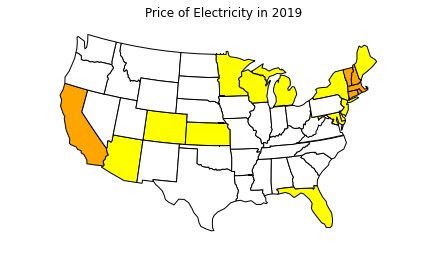

<Figure size 576x360 with 0 Axes>

In [51]:
tag_dict2 = dict(zip(Analysis1_df["State"], Analysis1_df["2019 price"]))
fig = plt.figure()

ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())

ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

#max_users = float(max(Analysis1_df["2019 Pop Est"]))
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                     category='cultural', name=shapename)

#cmap = mpl.cm.Blues

plot = tag_dict2

ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)

ax.set_title('Price of Electricity in 2019')

#for state in shpreader.Reader(states_shp).geometries():
for astate in shpreader.Reader(states_shp).records():

    ### You want to replace the following code with code that sets the
    ### facecolor as a gradient based on the population density above
    #facecolor = [0.9375, 0.9375, 0.859375]
    
    #name = country.attributes['name_long']
    #num_users = str(Analysis1_df["State"])
    #ax.add_geometries(astate.geometry, ccrs.PlateCarree(),
    #            facecolor=cmap(num_users/max_users, 1))    
    
    edgecolor = 'black'

    try:
        # use the name of this state to get pop_density
        state_price = plot[ astate.attributes['name'] ]
    except:
        state_price = 0

    # simple scheme to assign color to each state
    if state_price < 10:
        facecolor = "white"
    elif state_price > 20:
        facecolor = "red"        
    elif state_price > 15:
        facecolor = "orange"
    else:
        facecolor = "yellow"

    # `astate.geometry` is the polygon to plot
    ax.add_geometries([astate.geometry], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor)

#sm = plt.cm.ScalarMappable()
#sm._A = []
#plt.colorbar(sm,ax=ax)

plt.figure(figsize=(8,5))
plt.show()

In [55]:
Pricerise = {"2019": (Analysis1_df["2019 price"].mean()),
             "2018": (Analysis1_df["2018 price"].mean()),
             "2017": (Analysis1_df["2017 price"].mean()),
             "2016": (Analysis1_df["2016 price"].mean()),
             "2015": (Analysis1_df["2015 price"].mean()),
            }

In [56]:
Pricerise

{'2019': 11.274399999999996,
 '2018': 11.204800000000004,
 '2017': 11.052799999999998,
 '2016': 10.806600000000001,
 '2015': 10.9068}

In [59]:
poprise = {"2019": (Analysis1_df["2019 Pop Est"].sum()),
             "2018": (Analysis1_df["2018 Pop Est"].sum()),
             "2017": (Analysis1_df["2017 Pop Est"].sum()),
             "2016": (Analysis1_df["2016 Pop Est"].sum()),
             "2015": (Analysis1_df["2015 Pop Est"].sum()),
            }

In [60]:
poprise

{'2019': 327533774,
 '2018': 325985954,
 '2017': 324290633,
 '2016': 322255496,
 '2015': 319959763}